In [50]:
# Importo librerías que voy a usar.

import pymongo
from pymongo import MongoClient
client = MongoClient ('localhost', 27017)
db = client['companies']

import pandas as pd
import numpy as np

from IPython.display import Image

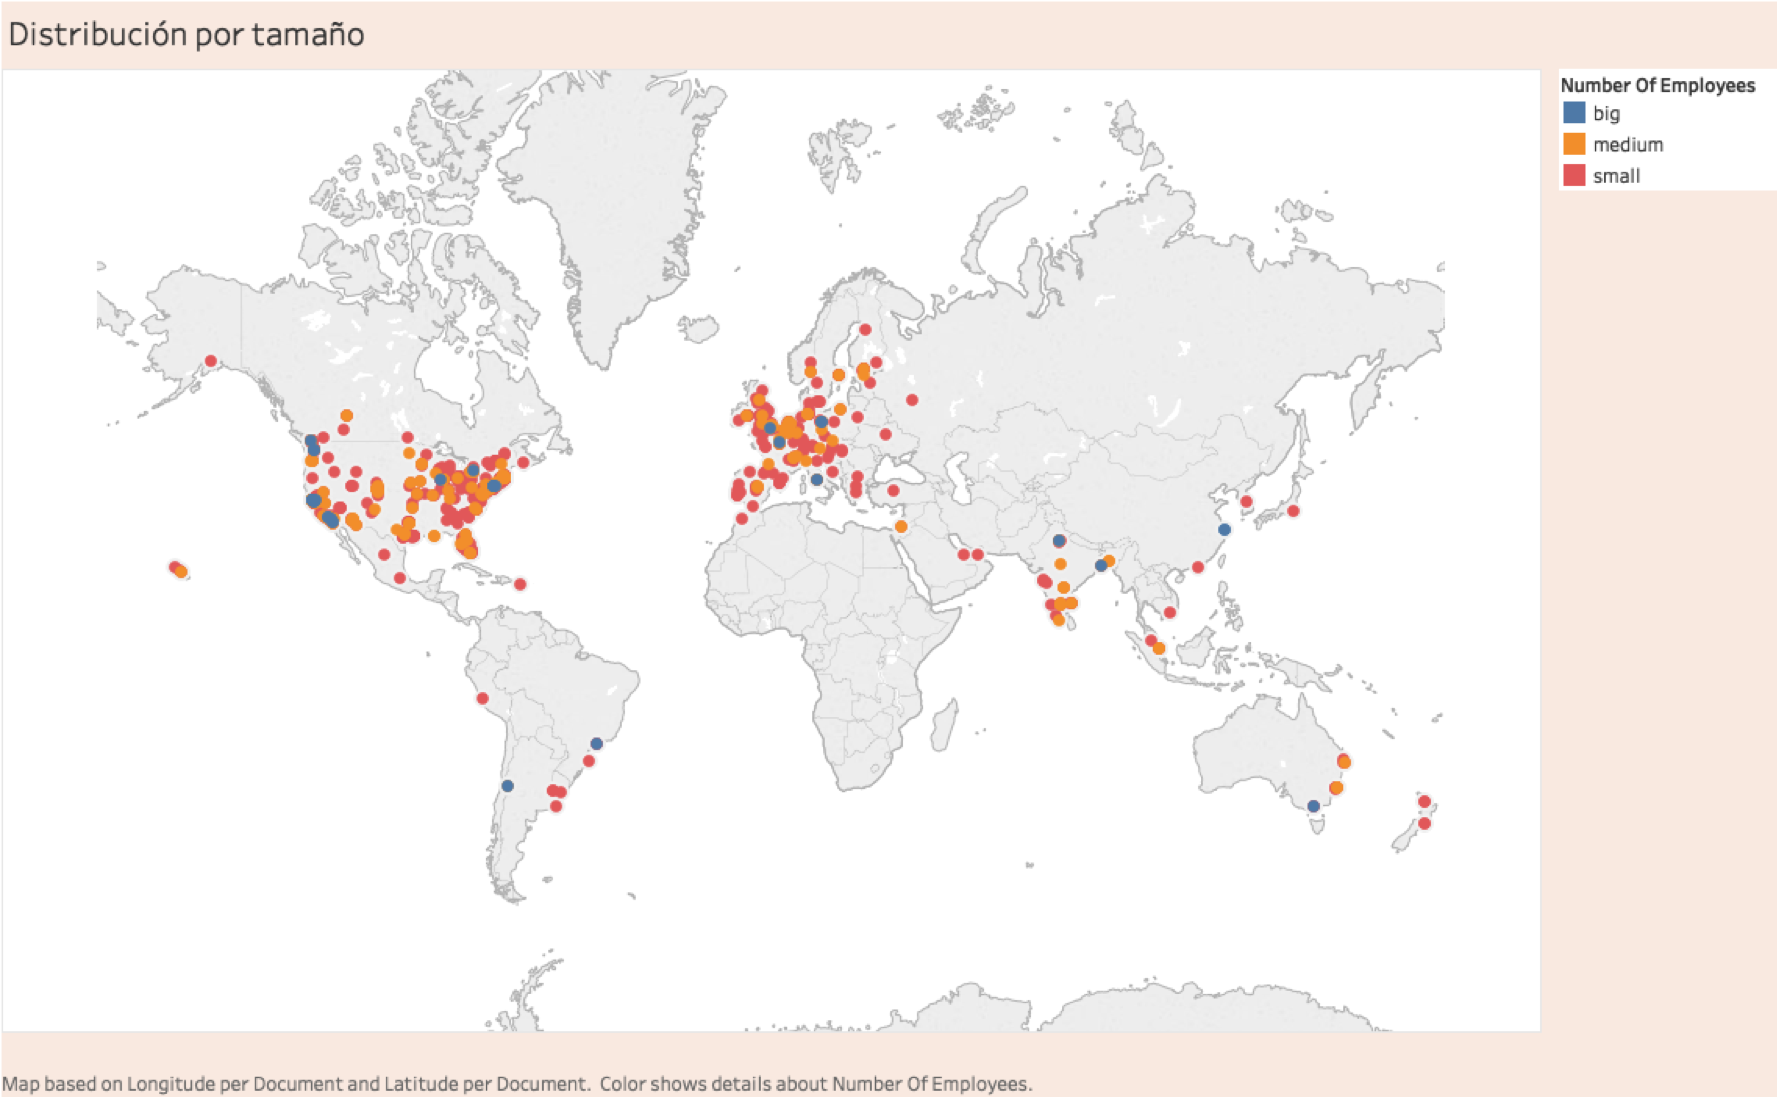

In [51]:
# Esta es la distribución de las empresas con las que me he quedado en el dataframe limpio

display(Image("geo-tamaño_mundial.png"))

#### Como se puede observar, la mayoría de empresas que interesan están concentradas en Europa y las costas de EEUU.

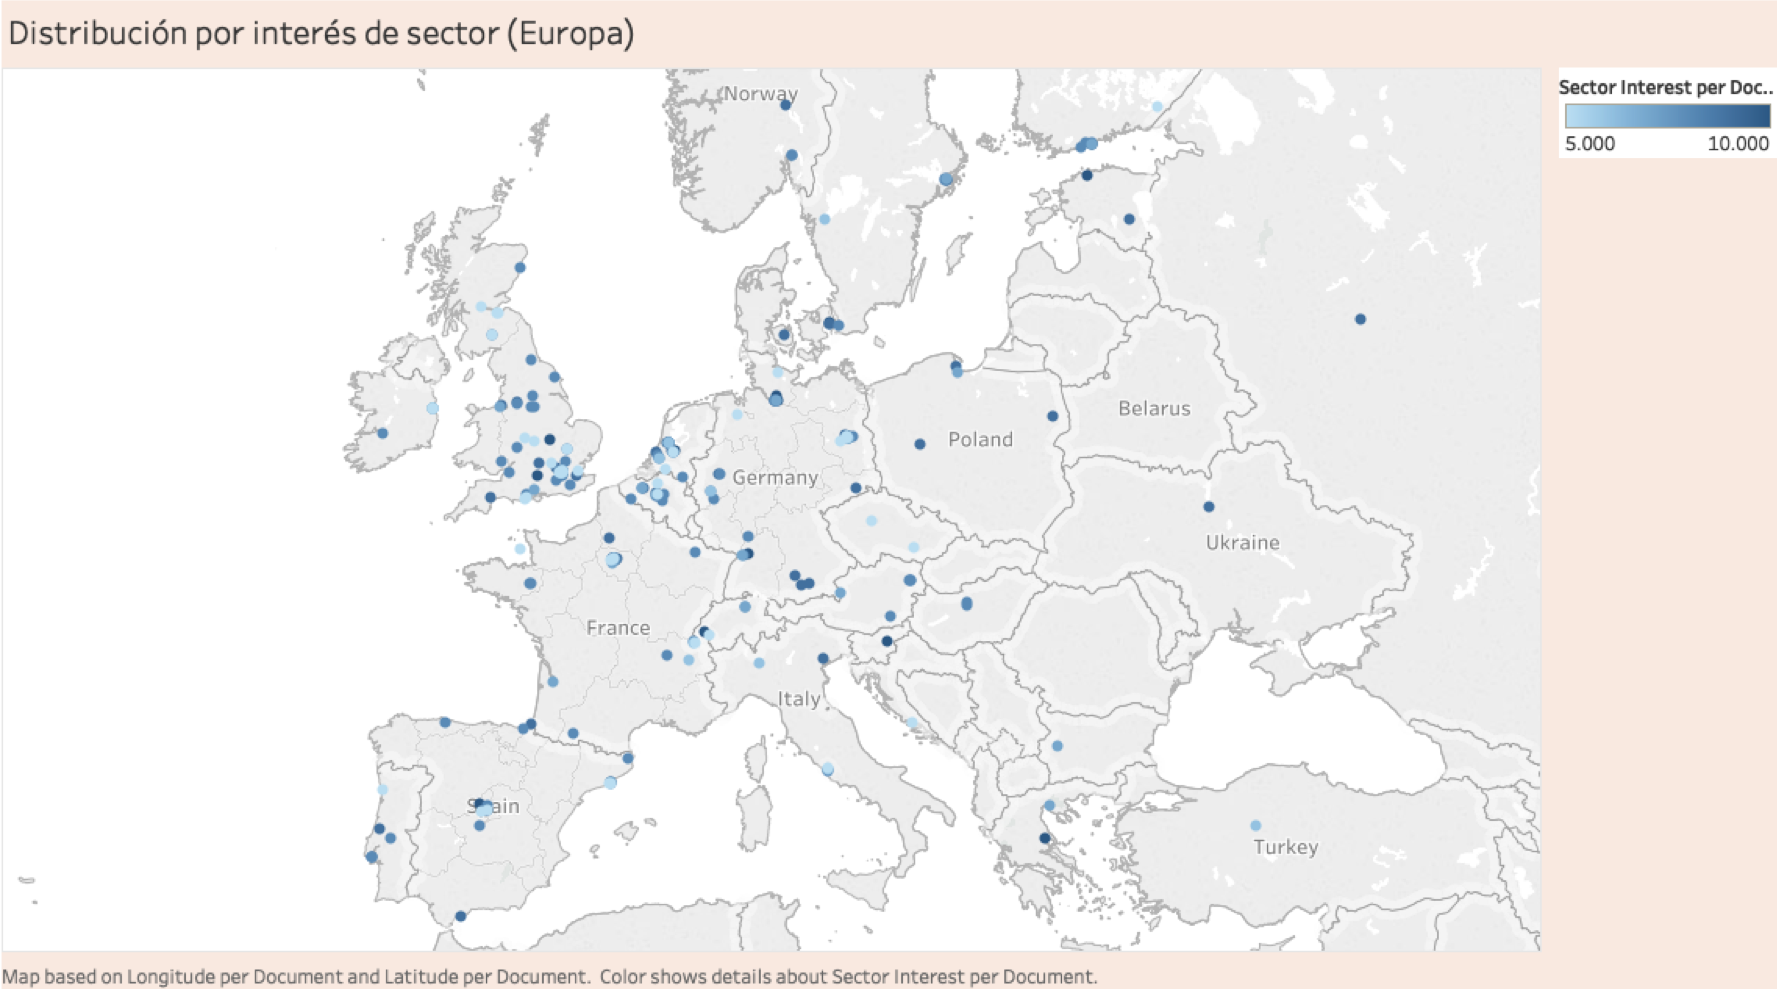

In [52]:
display(Image(("geo-sector_eur.png")))

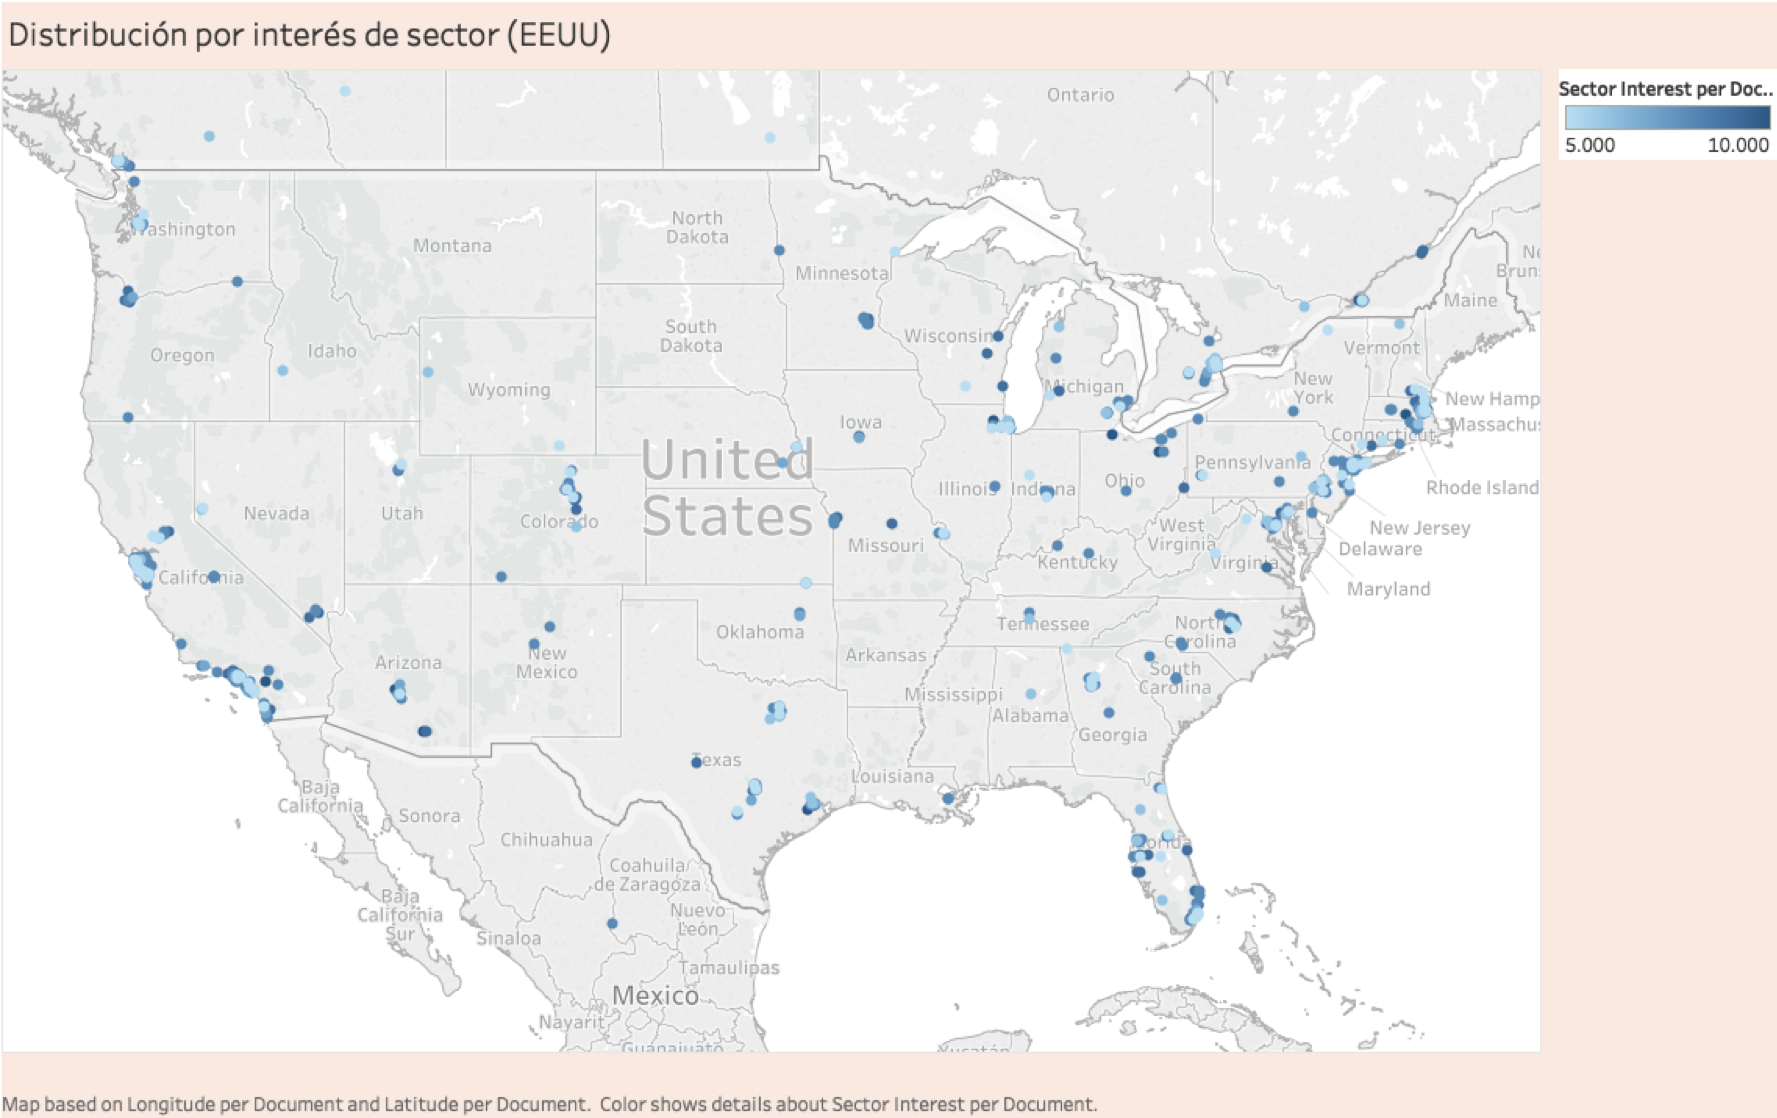

In [53]:
display(Image("geo-sector_eeuu.png"))

In [54]:
# Obtengo mi dataframe limpio

mydatabase = db.geospatial_clean.find()

In [55]:
mydataframe = pd.DataFrame(list(mydatabase))

mydataframe.head()

_id category_code               coordenadas  \
0  5cd7fc63b9961c04b3f4d715      software  [-122.392142, 37.782263]   
1  5cd7fc63b9961c04b3f4d716    enterprise     [-71.05781, 42.35892]   
2  5cd7fc63b9961c04b3f4d717   games_video  [-122.151158, 47.597965]   
3  5cd7fc63b9961c04b3f4d718   games_video  [-122.393229, 37.781265]   
4  5cd7fc63b9961c04b3f4d719        search   [-73.985506, 40.757929]   

                                 coordinates_latlong  \
0  {'type': 'Point', 'coordinates': [37.782263, -...   
1  {'type': 'Point', 'coordinates': [42.35892, -7...   
2  {'type': 'Point', 'coordinates': [47.597965, -...   
3  {'type': 'Point', 'coordinates': [37.781265, -...   
4  {'type': 'Point', 'coordinates': [40.757929, -...   

                                 coordinates_longlat country_code  \
0  {'type': 'Point', 'coordinates': [-122.392142,...          USA   
1  {'type': 'Point', 'coordinates': [-71.05781, 4...          USA   
2  {'type': 'Point', 'coordinates': [-122.151158,...          USA   
3  {'type': 'Point', 'coordinates': [-122.393229,...          USA   
4  {'type': 'Point', 'coordinates': [-73.985506, ...          USA   

   founded_year   latitude   longitude  money_raised_(M€)         name  \
0          2008  37.782263 -122.392142           8.014248      GoingOn   
1          2008  42.358920  -71.057810          16.028495     Cloudant   
2          2008  47.597965 -122.151158           0.000000      YouBeQB   
3          2008  37.781265 -122.393229           4.452360  Crunchyroll   
4          2012  40.757929  -73.985506           1.780944      PeekYou   

   sector_interest  size(small=1, med=2, big=3)  
0               10                            2  
1                5                            2  
2                9                            1  
3                9                            2  
4                5                            2

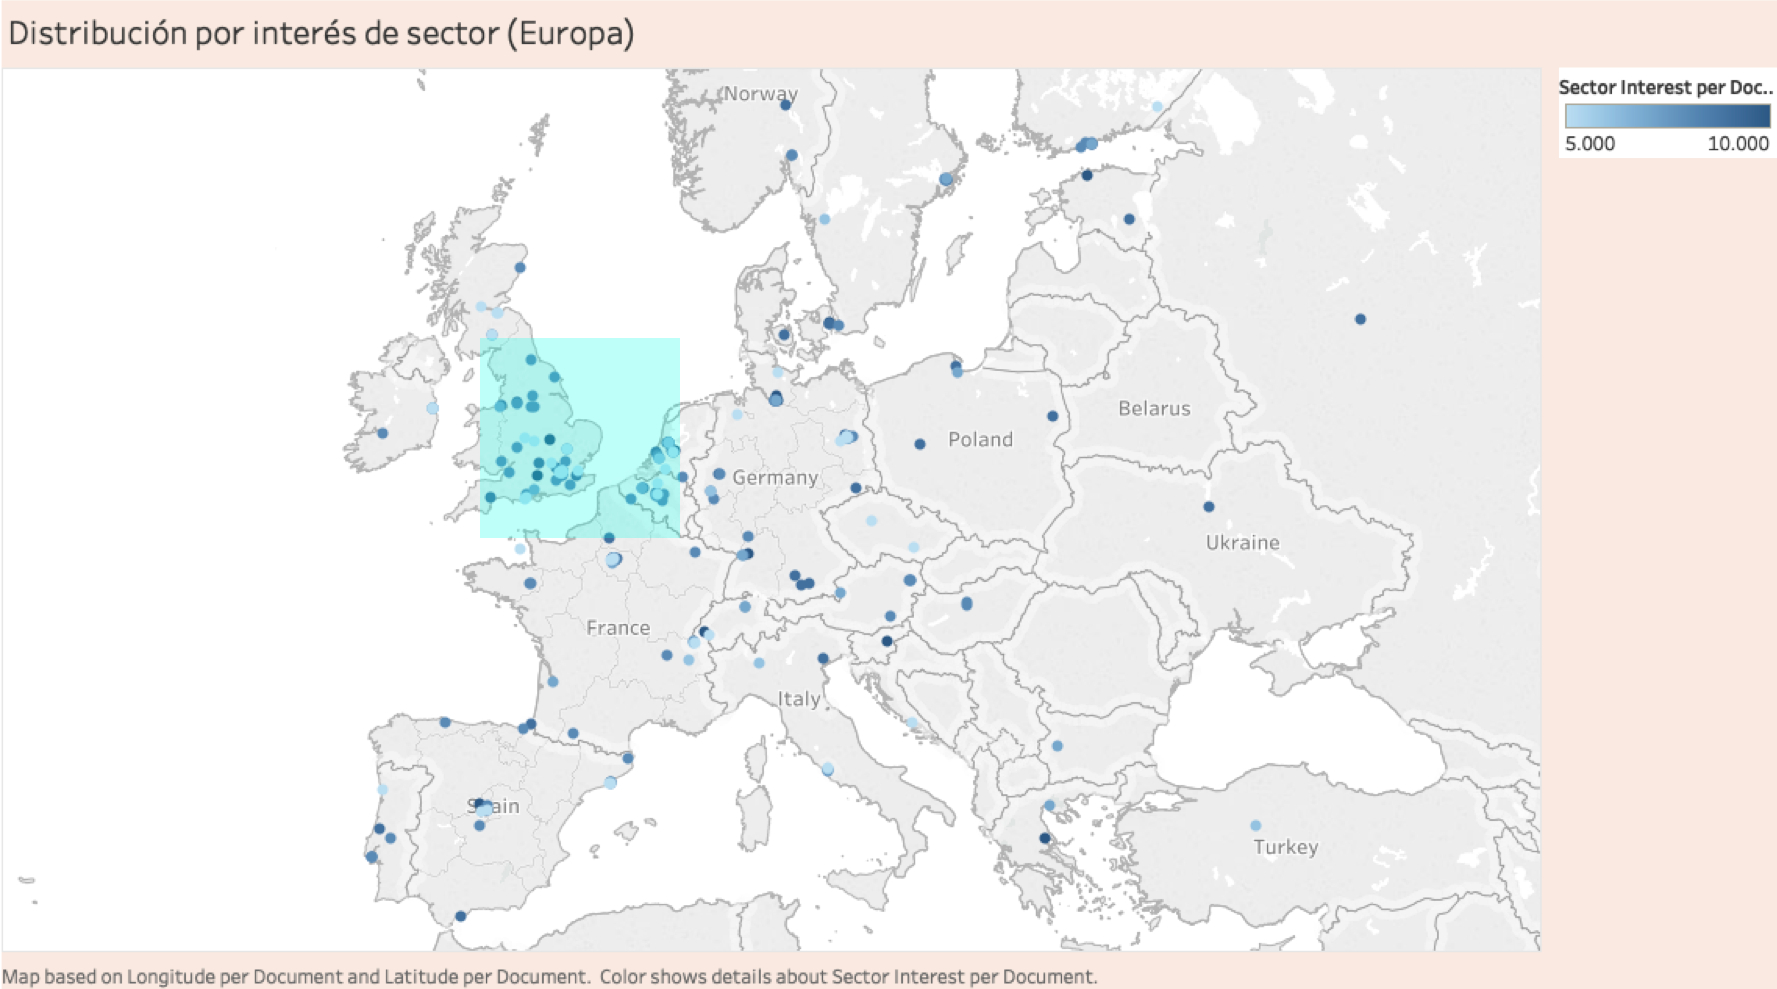

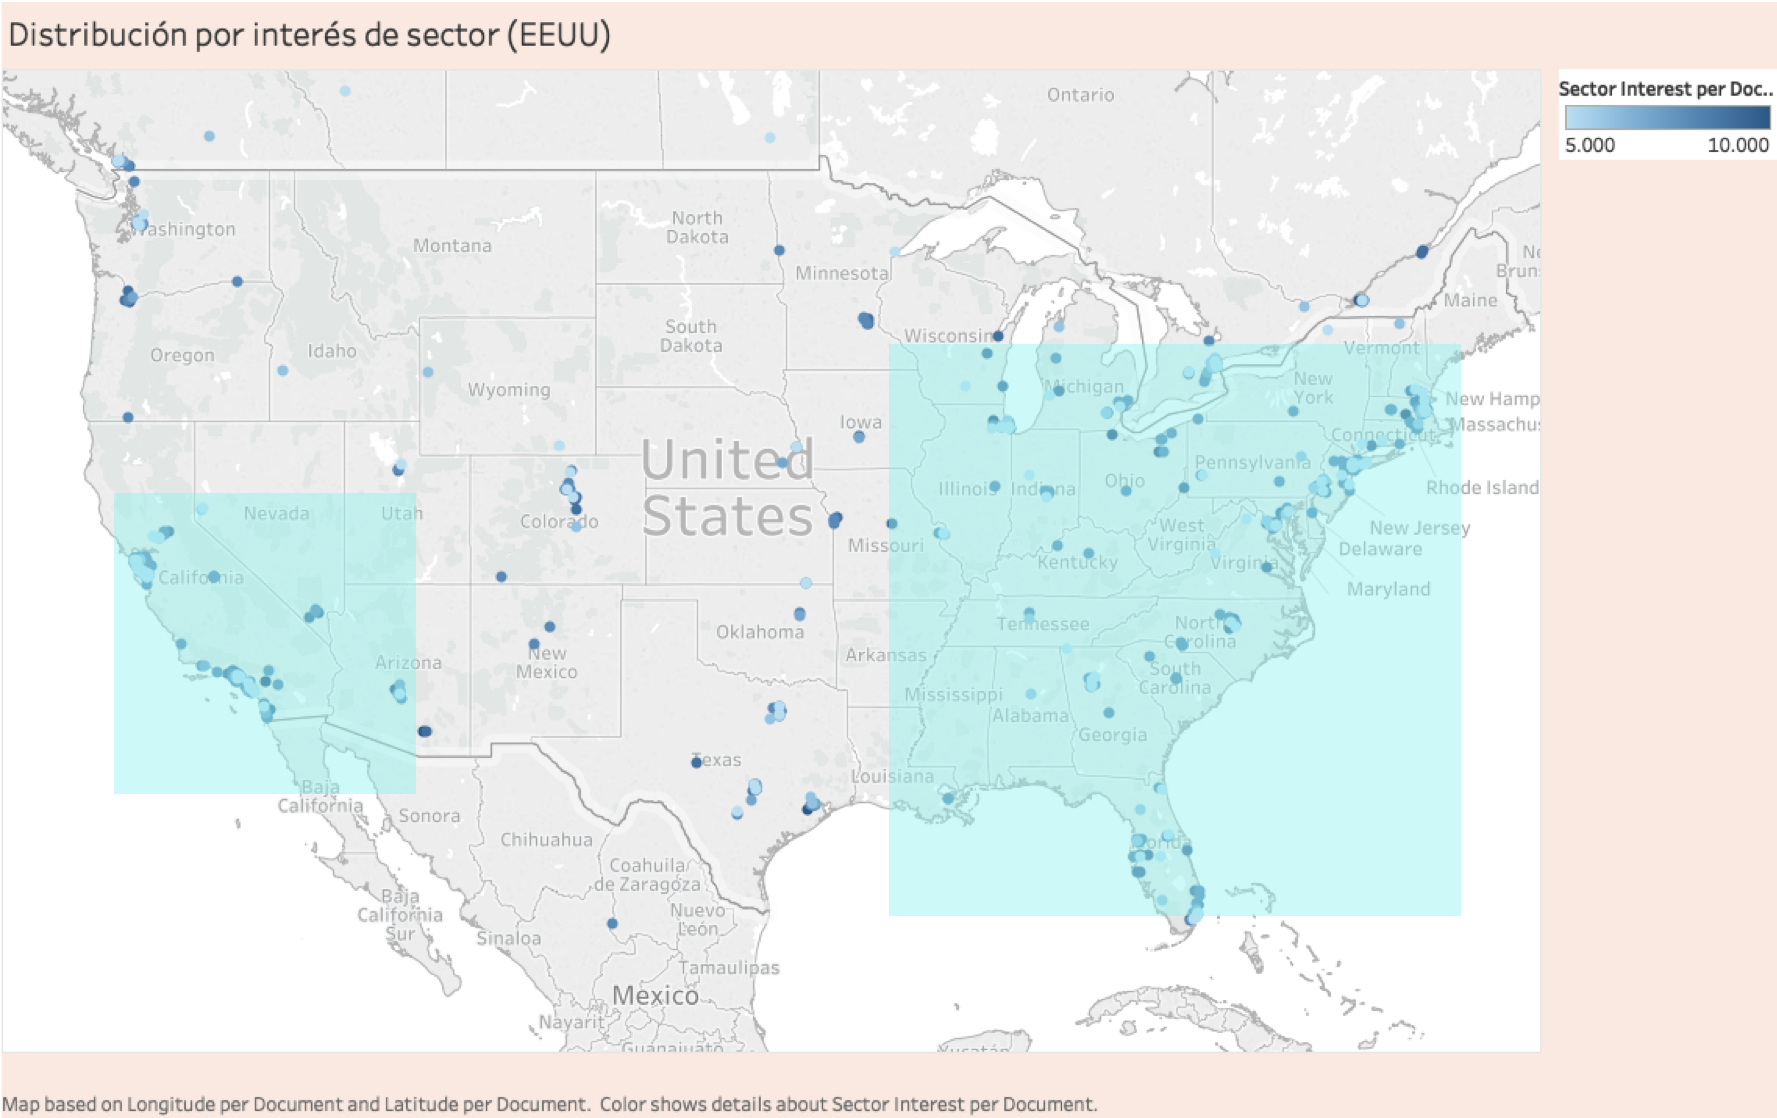

In [56]:
# Me voy a enfocar en las tres áreas de mayor interés, que son las siguientes.

display(Image("geo-area_eur.jpg"))
display(Image("geo-areas_eeuu.jpg"))

In [57]:
mydataframe.head()

_id category_code               coordenadas  \
0  5cd7fc63b9961c04b3f4d715      software  [-122.392142, 37.782263]   
1  5cd7fc63b9961c04b3f4d716    enterprise     [-71.05781, 42.35892]   
2  5cd7fc63b9961c04b3f4d717   games_video  [-122.151158, 47.597965]   
3  5cd7fc63b9961c04b3f4d718   games_video  [-122.393229, 37.781265]   
4  5cd7fc63b9961c04b3f4d719        search   [-73.985506, 40.757929]   

                                 coordinates_latlong  \
0  {'type': 'Point', 'coordinates': [37.782263, -...   
1  {'type': 'Point', 'coordinates': [42.35892, -7...   
2  {'type': 'Point', 'coordinates': [47.597965, -...   
3  {'type': 'Point', 'coordinates': [37.781265, -...   
4  {'type': 'Point', 'coordinates': [40.757929, -...   

                                 coordinates_longlat country_code  \
0  {'type': 'Point', 'coordinates': [-122.392142,...          USA   
1  {'type': 'Point', 'coordinates': [-71.05781, 4...          USA   
2  {'type': 'Point', 'coordinates': [-122.151158,...          USA   
3  {'type': 'Point', 'coordinates': [-122.393229,...          USA   
4  {'type': 'Point', 'coordinates': [-73.985506, ...          USA   

   founded_year   latitude   longitude  money_raised_(M€)         name  \
0          2008  37.782263 -122.392142           8.014248      GoingOn   
1          2008  42.358920  -71.057810          16.028495     Cloudant   
2          2008  47.597965 -122.151158           0.000000      YouBeQB   
3          2008  37.781265 -122.393229           4.452360  Crunchyroll   
4          2012  40.757929  -73.985506           1.780944      PeekYou   

   sector_interest  size(small=1, med=2, big=3)  
0               10                            2  
1                5                            2  
2                9                            1  
3                9                            2  
4                5                            2

In [37]:
# Establezco las coordenadas de las áreas de interés

zona_europa = {"lat": np.arange(50.7, 52.5, 0.000001), "lon": np.arange(-2.3, 5.6, 0.000001)}
zona_eeuu_este = {"lat": np.arange(41.9, 42.4, 0.000001), "lon": np.arange(-80.4, -79.4, 0.000001)}
zona_eeuu_oste = {"lat": np.arange(32.7, 38.7, 0.000001), "lon": np.arange(-122.5, -111.9, 0.000001)}

In [58]:
# Obtengo las coordenadas de las empresas dentro de las zonas que me interesan.

longitudes = []
latitudes = []

for coord in mydataframe["coordenadas"]:
    if (-2.3 < coord[0] < 5.6 and 50.7 < coord[1] < 52.5) or (-80.4 < coord[0] < -79.4 and 41.9 < coord[1] < 42.4) or (-122.5 < coord[0] < -111.9 and 32.7 < coord[1] < 38.7):
        longitudes.append(coord[0])
        latitudes.append(coord[1])
    
print(len(longitudes))
print(len(latitudes))

370
370


In [59]:
# Obtengo los datos de cada área de interés

areas = []

for i in range(len(longitudes)):
        areas.append(pd.DataFrame(db.geospatial_clean.find({"coordenadas": 
                          {"$near":
                           {"$geometry":
                            {"type": "Point", "coordinates": [longitudes[i], latitudes[i]]},"$maxDistance": 1000}}},
                         {"_id": 0, "coordenadas": 1, "founded_year": 1,"money_raised_(M€)": 1, 
                          "size(small=1, med=2, big=3)": 1, "sector_interest": 1})))

In [60]:
# Defino la función para valorar cada área, según el número de empresas en la zona, el ratio de tamaños de empresas,
# la afinidad con los sectores de las empresas, la antigüedad de las empresas, y el dinero total recaudado. A cada 
# factor le doy un peso correspondiente con mis intereses.

def area_valoration(area):
    interes_sector = area["sector_interest"].sum()
    num_empresas = len(area.index)
    ratio_bigsmall = np.var(area["size(small=1, med=2, big=3)"])
    empresas_recientes = area["founded_year"].sum()
    dinero_levantado = area["money_raised_(M€)"].sum()
    return 0.4*interes_sector + 0.3*num_empresas + 0.2*ratio_bigsmall + 0.05*empresas_recientes + 0.05*dinero_levantado


In [61]:
# Reúno las valoraciones en una lista, para obtener la valoración máxima, y su correspondiente área.

valorations = []

for i in areas:
    valorations.append(area_valoration(i))
    
print(len(areas))
print(len(valorations))
print(max(valorations))
print(valorations.index(max(valorations)))

370
370
2915.1932723935442
121


In [62]:
# Compruebo a ver si hay varias áreas con la valoración máxima

for i in valorations:
    if i == 2915.1932723935442:
        print(i)

2915.1932723935442
2915.1932723935442


In [63]:
# Hay dos, así que le doy la vuelta a la lista para acceder al índice de la segunda

for i in valorations[::-1]:
    if i == 2915.1932723935442:
        print(valorations[::-1].index(i))

222
222


In [64]:
# Ya tengo las dos áreas que más me interesan:

coordsa = [longitudes[121], latitudes[121]]
coordsb = [longitudes[-223], latitudes[-223]]

a = areas[121]
b = areas[-223]

print(coordsa)
print(coordsb)
display(a)

[-122.3999719, 37.7870923]
[-122.3999719, 37.7870923]


coordenadas  founded_year  money_raised_(M€)  \
0   [-122.3999719, 37.7870923]          2008           3.561888   
1   [-122.3999719, 37.7870923]          2008           3.561888   
2     [-122.397759, 37.787183]          2008          10.685663   
3      [-122.401406, 37.78866]          2008           0.000000   
4   [-122.4013624, 37.7893215]          2008           3.561888   
5   [-122.3998782, 37.7896292]          2009           0.000000   
6     [-122.397582, 37.785271]          2009           8.904720   
7   [-122.4021988, 37.7900992]          2008           6.233304   
8      [-122.404403, 37.78691]          2008           0.890472   
9      [-122.404403, 37.78691]          2008           0.890472   
10  [-122.4011706, 37.7911186]          2008          25.823687   
11    [-122.401942, 37.791068]          2008           3.000000   
12    [-122.404488, 37.790032]          2008           0.000000   
13  [-122.4020588, 37.7919639]          2008           0.000000   
14    [-122.402349, 37.792394]          2008           0.000000   
15    [-122.402667, 37.793473]          2008           0.000000   
16  [-122.3915063, 37.7890183]          2008           0.000000   
17    [-122.394958, 37.781262]          2008           0.000000   
18     [-122.39736, 37.794043]          2008           0.000000   
19    [-122.396744, 37.780134]          2008           0.000000   
20    [-122.403223, 37.794124]          2008           0.000000   
21    [-122.403223, 37.794124]          2008           0.000000   
22    [-122.392142, 37.782263]          2008           8.014248   
23     [-122.40971, 37.788796]          2008           4.452360   
24    [-122.393229, 37.781265]          2008           4.452360   
25    [-122.401803, 37.778991]          2008           0.890472   
26  [-122.4005983, 37.7955307]          2008          31.166518   
27    [-122.391061, 37.781689]          2008           0.000000   

    sector_interest  size(small=1, med=2, big=3)  
0                 8                            2  
1                 8                            2  
2                 8                            3  
3                 8                            3  
4                 9                            2  
5                10                            1  
6                 9                            2  
7                 7                            2  
8                 9                            1  
9                 9                            1  
10                8                            2  
11                8                            1  
12                8                            1  
13                5                            1  
14                8                            1  
15                5                            1  
16                8                            1  
17                8                            2  
18               10                            2  
19                9                            1  
20                8                            1  
21                8                            1  
22               10                            2  
23                8                            2  
24                9                            2  
25                5                            2  
26                9                            3  
27                5                            1

In [65]:
# Veo que son las mismas coordenadas. Compruebo a ver si hay varios registros con las mismas coordenadas

filtered = mydataframe[mydataframe["longitude"] == -122.3999719]
filtered

_id category_code                 coordenadas  \
330  5cd7fc63b9961c04b3f4d85f           web  [-122.3999719, 37.7870923]   
410  5cd7fc63b9961c04b3f4d8af           web  [-122.3999719, 37.7870923]   

                                   coordinates_latlong  \
330  {'type': 'Point', 'coordinates': [37.7870923, ...   
410  {'type': 'Point', 'coordinates': [37.7870923, ...   

                                   coordinates_longlat country_code  \
330  {'type': 'Point', 'coordinates': [-122.3999719...          USA   
410  {'type': 'Point', 'coordinates': [-122.3999719...          USA   

     founded_year   latitude   longitude  money_raised_(M€)     name  \
330          2008  37.787092 -122.399972           3.561888  Lolapps   
410          2008  37.787092 -122.399972           3.561888  Lolapps   

     sector_interest  size(small=1, med=2, big=3)  
330                8                            2  
410                8                            2

In [66]:
# En efecto. Es la misma empresa. Por tanto, ya tengo las coordenadas para mi oficina.

mi_oficina = [-122.3999719, 37.7870923]

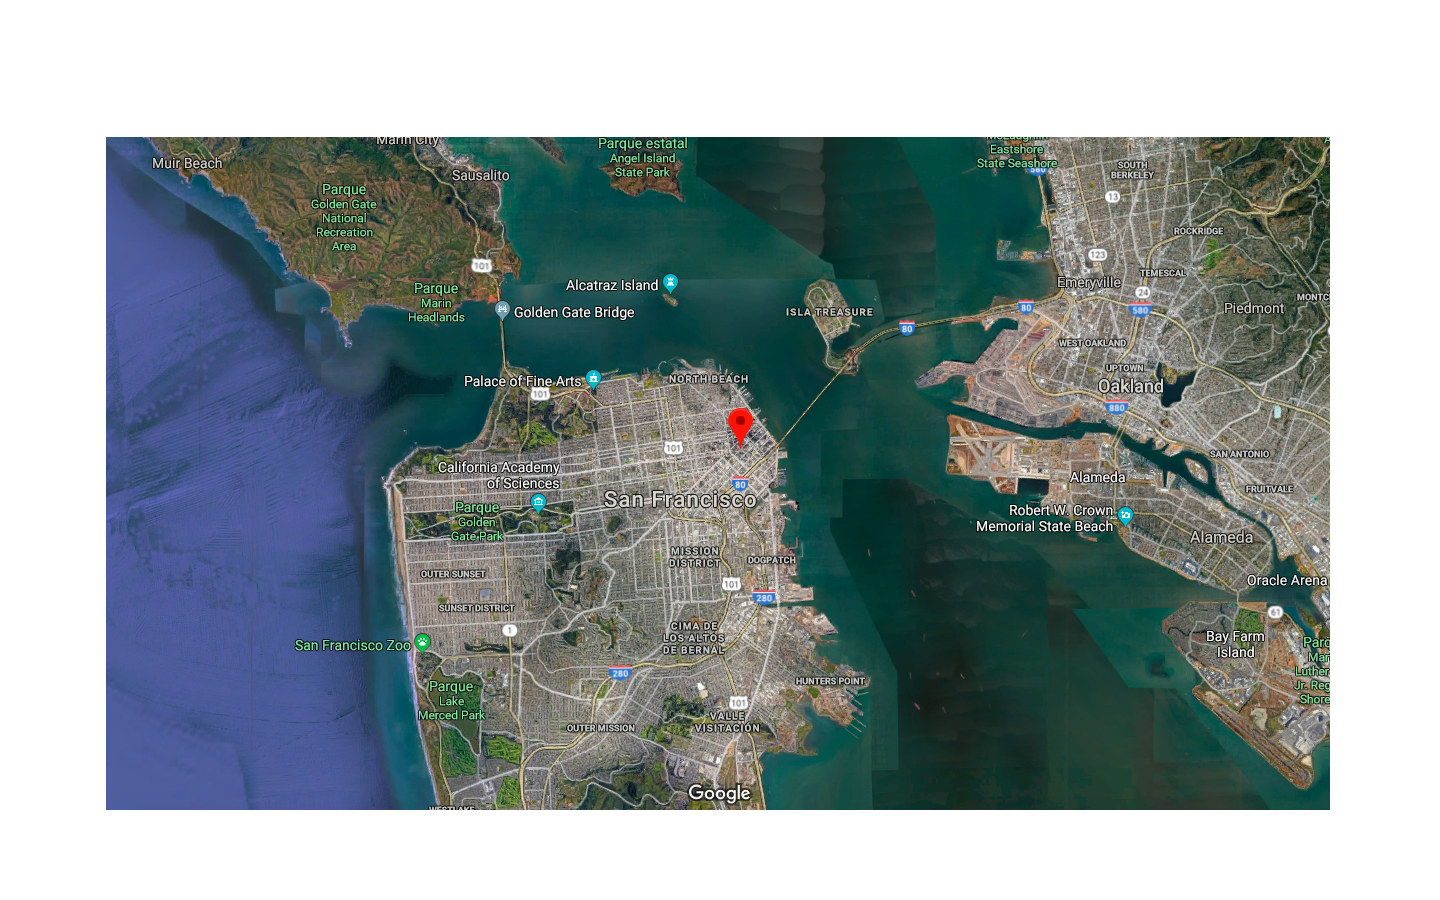

In [67]:
display(Image("geo-myoffice-map.png"))

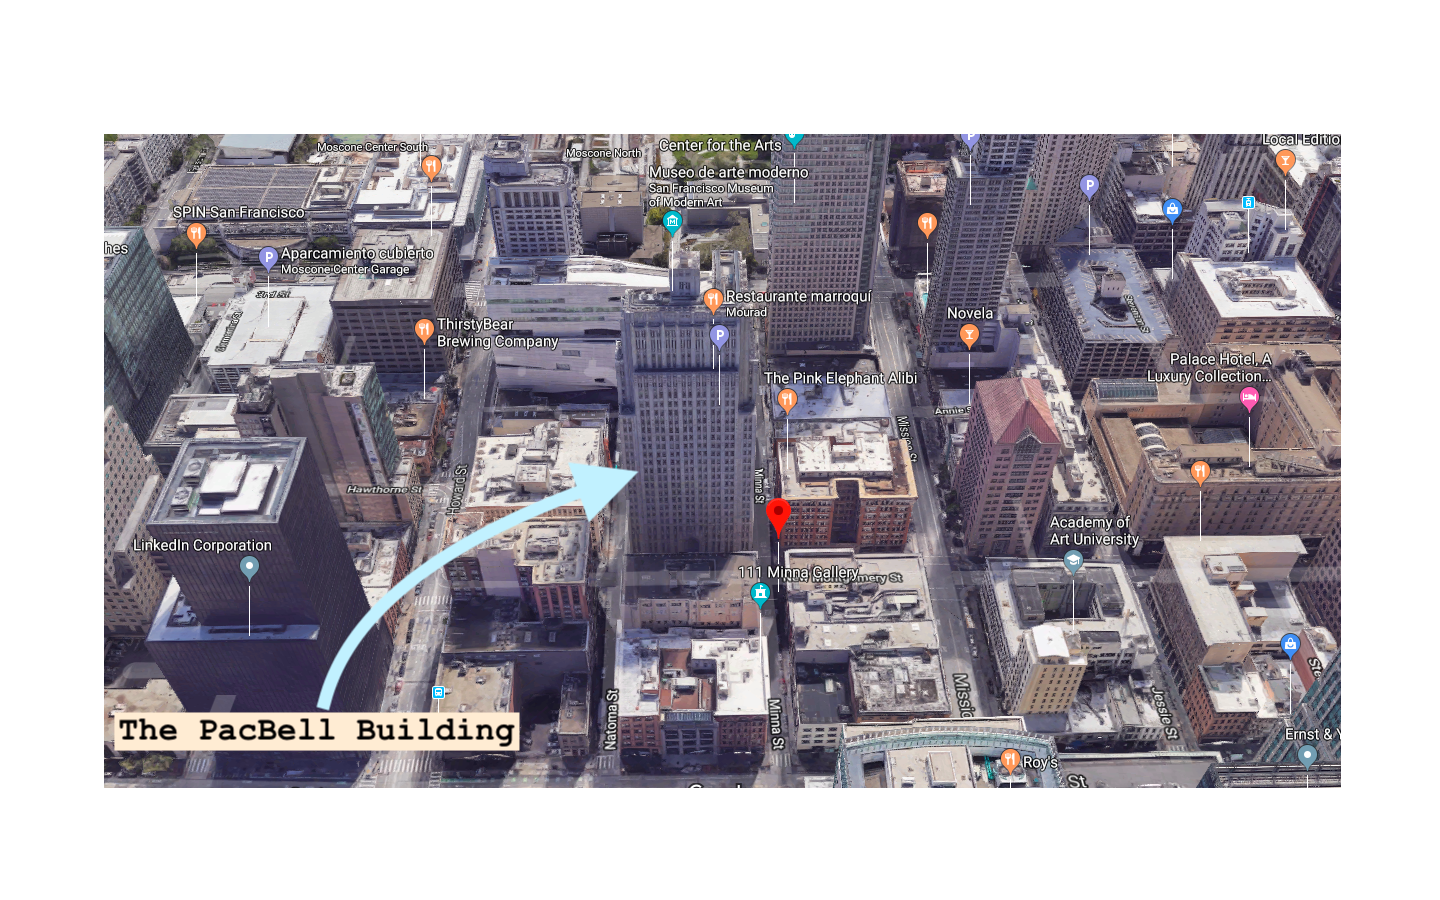

In [68]:
display(Image("geo-myoffice.png"))

In [69]:
pac_bell_building = "https://42floors.com/us/ca/san-francisco/140-new-montgomery-st"